# Log Analysis

## Imports

In [1]:
import pandas as pd

In [221]:
import seaborn as sns

sns.set_style("whitegrid")


## Definitions

In [2]:
LOG_FILE = '../logs/experiments.log'

In [60]:
LOG_DIR = '../logs/'

In [275]:
def log_file_to_df(log_file):
    records = []
    for line in open(log_file):
        
        record = dict()
        record['date'], record['pid'], record['name'], record['level'], record['msg'] = line.split(' - ')
        try:
            record['dataset'], record['model'], record['strategy'] = record['name'].split(',')
        except ValueError :
            continue
        record['model'] = record['model'].strip()
        record['dataset'] = record['dataset'].strip()[1:]
        record['strategy'] = record['strategy'].strip()[:-1]
        records.append(record)
    
    return pd.DataFrame(records)

In [246]:
def get_warnings_df(df):
    
    # Detecta experimentos finalizados
    processos_finalizados = df[df.msg.str.contains('finalizado')].name

    # Contagem de warnings em experimentos finalizados
    warnings_df = df[(df.name.isin(processos_finalizados)) & (df.level == 'WARNING')]

    return warnings_df


In [218]:
def get_warnings_count(df):
    
    warnings_df[['dataset', 'model', 'strategy']] = warnings_df.name.str.split(',', expand=True)

    warnings_df.dataset = warnings_df.dataset.apply(lambda e: e.strip()[1:])
    warnings_df.strategy = warnings_df.strategy.apply(lambda e: e.strip()[:-1])

    return warnings_df


In [294]:
def plot_counts(warnings_df):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.countplot(data=warnings_df, x='strategy', hue='model', ax=ax, palette="tab10")
    ax.tick_params(axis='x', rotation=90)
    ax.set_title('Erros por estratégia')


In [296]:
def plot_hist(warnings_df):
    ax = sns.histplot(warnings_df.groupby('model').name.value_counts().reset_index(), x='count', binwidth=50, binrange=(0,500), hue='model', multiple='stack', palette="tab10")
    ax.set_title('Distribuição de warnings')

## Analysis

### Log file Unitário

In [298]:
df_log_file = log_file_to_df(LOG_FILE)
df_log_file.head()

,date,pid,name,level,msg,dataset,model,strategy
0,"2024-07-17 13:01:20,763",95956,"(abalone-3class, SVC, margin_sampling)",INFO,Experimento já havia sido realizado\n,abalone-3class,SVC,margin_sampling
1,"2024-07-17 13:01:20,763",95958,"(abalone-3class, SVC, training_utility_sampling)",INFO,Experimento já havia sido realizado\n,abalone-3class,SVC,training_utility_sampling
2,"2024-07-17 13:01:20,763",95955,"(abalone-3class, SVC, random_sampling)",INFO,Experimento já havia sido realizado\n,abalone-3class,SVC,random_sampling
3,"2024-07-17 13:01:20,763",95957,"(abalone-3class, SVC, density_weighted_sampling)",INFO,Experimento já havia sido realizado\n,abalone-3class,SVC,density_weighted_sampling
4,"2024-07-17 13:01:20,764",95959,"(abalone-3class, SVC, borderline_points_sampling)",INFO,Experimento já havia sido realizado\n,abalone-3class,SVC,borderline_points_sampling


In [300]:
log_file_warnings = get_warnings_df(df_log_file)

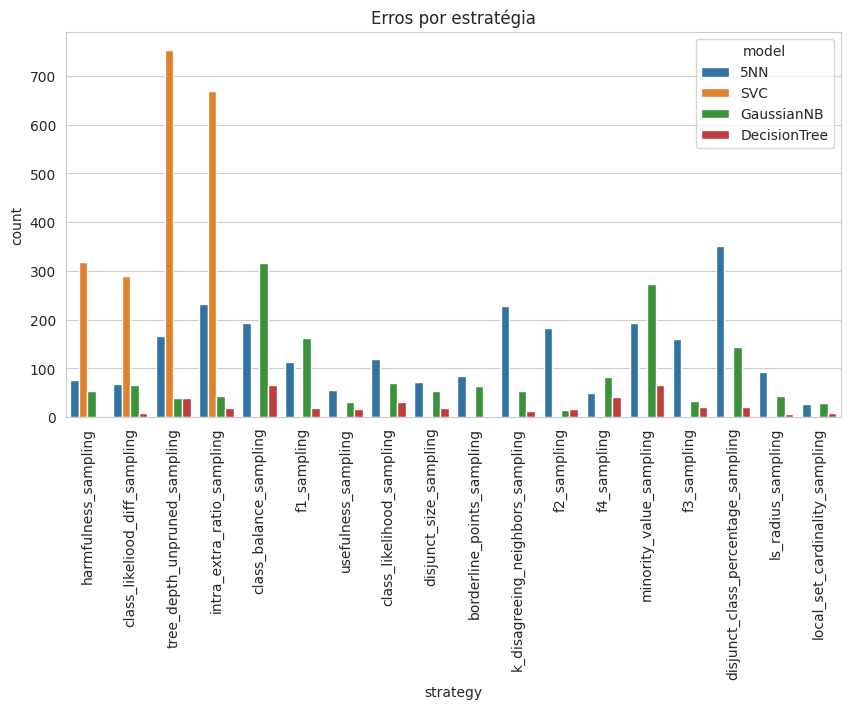

In [301]:
plot_counts(log_file_warnings)

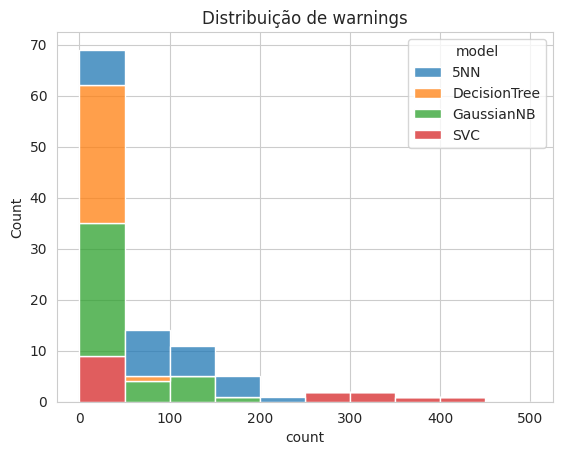

In [302]:
plot_hist(log_file_warnings)

### Todos os logs

In [210]:
log_files = !find $LOG_DIR -type f

In [276]:
logs_df = pd.concat(log_file_to_df(f) for f in log_files)
logs_df

,date,pid,name,level,msg,dataset,model,strategy
0,"2024-06-28 00:08:00,677",3264760,"[wine.csv, 5NN, disjunct_size_sampling]",INFO,Processo iniciado\n,wine.csv,5NN,disjunct_size_sampling
1,"2024-06-28 00:11:14,425",3264760,"[wine.csv, 5NN, disjunct_size_sampling]",WARNING,[|L|=67] An error occurred while calculating d...,wine.csv,5NN,disjunct_size_sampling
2,"2024-06-28 00:11:14,465",3264760,"[wine.csv, 5NN, disjunct_size_sampling]",WARNING,[|L|=68] An error occurred while calculating d...,wine.csv,5NN,disjunct_size_sampling
3,"2024-06-28 00:11:14,508",3264760,"[wine.csv, 5NN, disjunct_size_sampling]",WARNING,[|L|=69] An error occurred while calculating d...,wine.csv,5NN,disjunct_size_sampling
4,"2024-06-28 00:11:14,538",3264760,"[wine.csv, 5NN, disjunct_size_sampling]",WARNING,[|L|=70] An error occurred while calculating d...,wine.csv,5NN,disjunct_size_sampling
...,...,...,...,...,...,...,...,...
6379,"2024-07-04 06:37:41,166",3264761,"[mfeat-fourier.csv, 5NN, minority_value_sampling]",WARNING,[|L|=104] An error occurred while calculating ...,mfeat-fourier.csv,5NN,minority_value_sampling
6380,"2024-07-04 06:37:41,528",3264761,"[mfeat-fourier.csv, 5NN, minority_value_sampling]",WARNING,[|L|=105] An error occurred while calculating ...,mfeat-fourier.csv,5NN,minority_value_sampling
6381,"2024-07-04 06:37:41,895",3264761,"[mfeat-fourier.csv, 5NN, minority_value_sampling]",WARNING,[|L|=106] An error occurred while calculating ...,mfeat-fourier.csv,5NN,minority_value_sampling
6382,"2024-07-04 06:43:14,912",3264761,"[mfeat-fourier.csv, 5NN, minority_value_sampling]",INFO,Processo finalizado\n,mfeat-fourier.csv,5NN,minority_value_sampling


In [277]:
warnings_df = get_warnings_df(logs_df)
warnings_df

,date,pid,name,level,msg,dataset,model,strategy
1,"2024-06-28 00:11:14,425",3264760,"[wine.csv, 5NN, disjunct_size_sampling]",WARNING,[|L|=67] An error occurred while calculating d...,wine.csv,5NN,disjunct_size_sampling
2,"2024-06-28 00:11:14,465",3264760,"[wine.csv, 5NN, disjunct_size_sampling]",WARNING,[|L|=68] An error occurred while calculating d...,wine.csv,5NN,disjunct_size_sampling
3,"2024-06-28 00:11:14,508",3264760,"[wine.csv, 5NN, disjunct_size_sampling]",WARNING,[|L|=69] An error occurred while calculating d...,wine.csv,5NN,disjunct_size_sampling
4,"2024-06-28 00:11:14,538",3264760,"[wine.csv, 5NN, disjunct_size_sampling]",WARNING,[|L|=70] An error occurred while calculating d...,wine.csv,5NN,disjunct_size_sampling
5,"2024-06-28 00:11:14,561",3264760,"[wine.csv, 5NN, disjunct_size_sampling]",WARNING,[|L|=71] An error occurred while calculating d...,wine.csv,5NN,disjunct_size_sampling
...,...,...,...,...,...,...,...,...
6377,"2024-07-04 06:37:40,371",3264761,"[mfeat-fourier.csv, 5NN, minority_value_sampling]",WARNING,[|L|=102] An error occurred while calculating ...,mfeat-fourier.csv,5NN,minority_value_sampling
6378,"2024-07-04 06:37:40,770",3264761,"[mfeat-fourier.csv, 5NN, minority_value_sampling]",WARNING,[|L|=103] An error occurred while calculating ...,mfeat-fourier.csv,5NN,minority_value_sampling
6379,"2024-07-04 06:37:41,166",3264761,"[mfeat-fourier.csv, 5NN, minority_value_sampling]",WARNING,[|L|=104] An error occurred while calculating ...,mfeat-fourier.csv,5NN,minority_value_sampling
6380,"2024-07-04 06:37:41,528",3264761,"[mfeat-fourier.csv, 5NN, minority_value_sampling]",WARNING,[|L|=105] An error occurred while calculating ...,mfeat-fourier.csv,5NN,minority_value_sampling


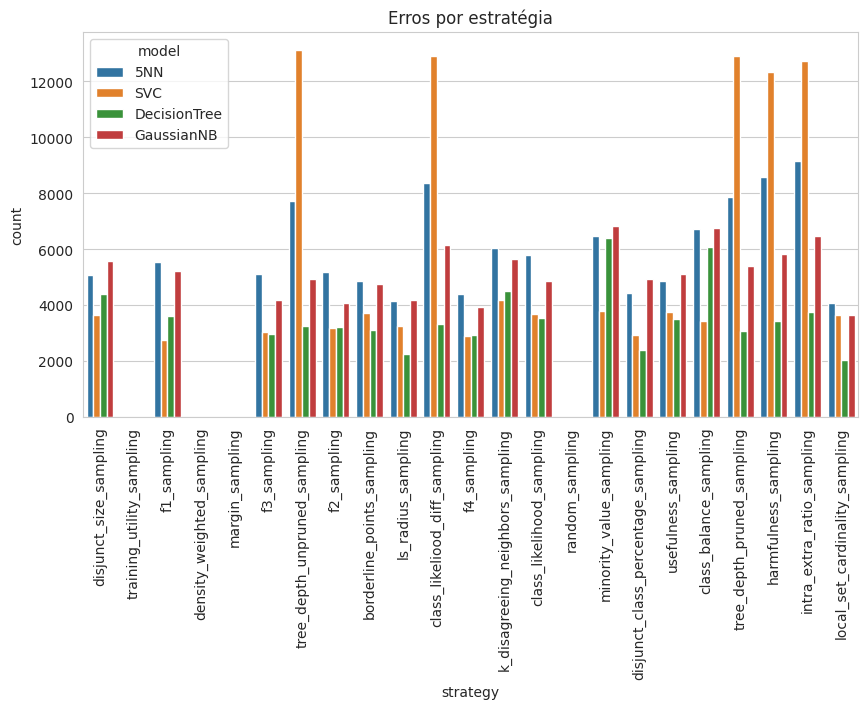

In [295]:
plot_counts(warnings_df)

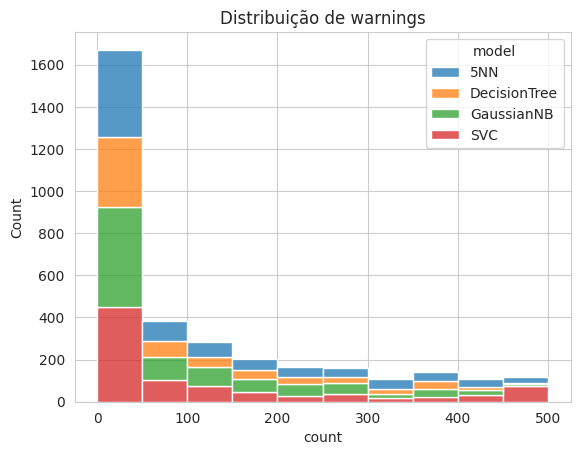

In [297]:
plot_hist(warnings_df)